# Histograms and Box Plots

### Introduction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
reviews = pd.read_csv('fandango_scores.csv')
cols = ['FILM', 'RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue']
norm_reviews = reviews[cols]
norm_reviews.head()

,FILM,RT_user_norm,Metacritic_user_nom,IMDB_norm,Fandango_Ratingvalue
0,Avengers: Age of Ultron (2015),4.3,3.55,3.90,4.5
1,Cinderella (2015),4.0,3.75,3.55,4.5
2,Ant-Man (2015),4.5,4.05,3.90,4.5
3,Do You Believe? (2015),4.2,2.35,2.70,4.5
4,Hot Tub Time Machine 2 (2015),1.4,1.70,2.55,3.0


### Frequence Distribution

Let's first compare the **frequency distributions** of user ratings from Fandango with those from IMDB using tables. A column's frequency distribution consists of the unique values in that column along with the count for each of those values (or their frequency). We can use `Series.value_counts()` to return the frequency distribution as Series object:

In [4]:
freq_counts = norm_reviews['Fandango_Ratingvalue'].value_counts()
freq_counts

4.1    16
4.2    12
3.9    12
4.3    11
3.7     9
3.5     9
4.5     9
3.4     9
3.6     8
4.4     7
4.0     7
3.2     5
2.9     5
3.8     5
3.3     4
4.6     4
3.0     4
4.8     3
3.1     3
2.8     2
2.7     2
Name: Fandango_Ratingvalue, dtype: int64

The resulting Series object is sorted by frequency in descending order.

While this ordering is helpful when we're looking to quickly find the most common values in a given column, it's not helpful when trying to understand the range that the values in the column span. We can use `Series.sort_index()` to sort the frequency distribution in ascending order by the values in the column (which make up the index for the Series object):

In [5]:
freq_counts = norm_reviews['Fandango_Ratingvalue'].value_counts()
sorted_freq_counts = freq_counts.sort_index()
sorted_freq_counts

2.7     2
2.8     2
2.9     5
3.0     4
3.1     3
3.2     5
3.3     4
3.4     9
3.5     9
3.6     8
3.7     9
3.8     5
3.9    12
4.0     7
4.1    16
4.2    12
4.3    11
4.4     7
4.5     9
4.6     4
4.8     3
Name: Fandango_Ratingvalue, dtype: int64

---
1. Use the `value_counts()` method to return the frequency counts for the `Fandango_Ratingvalue` column. Sort the resulting Series object by the index and assign to `fandango_distribution`.
2. Use the `value_counts()` method to return frequency counts for the `IMDB_norm` column. Sort the resulting Series object by the index and assign to `imdb_distribution`.
3. Use the `print()` function to display `fandango_distribution` and `imdb_distribution`.

In [7]:
frequency_fandango = norm_reviews['Fandango_Ratingvalue'].value_counts()
fandango_distribution = frequency_fandango.sort_index()
frequency_imdb = norm_reviews['IMDB_norm'].value_counts()
imdb_distribution = frequency_imdb.sort_index()

In [8]:
fandango_distribution

2.7     2
2.8     2
2.9     5
3.0     4
3.1     3
3.2     5
3.3     4
3.4     9
3.5     9
3.6     8
3.7     9
3.8     5
3.9    12
4.0     7
4.1    16
4.2    12
4.3    11
4.4     7
4.5     9
4.6     4
4.8     3
Name: Fandango_Ratingvalue, dtype: int64

In [9]:
imdb_distribution

2.00     1
2.10     1
2.15     1
2.20     1
2.30     2
2.45     2
2.50     1
2.55     1
2.60     2
2.70     4
2.75     5
2.80     2
2.85     1
2.90     1
2.95     3
3.00     2
3.05     4
3.10     1
3.15     9
3.20     6
3.25     4
3.30     9
3.35     7
3.40     1
3.45     7
3.50     4
3.55     7
3.60    10
3.65     5
3.70     8
3.75     6
3.80     3
3.85     4
3.90     9
3.95     2
4.00     1
4.05     1
4.10     4
4.15     1
4.20     2
4.30     1
Name: IMDB_norm, dtype: int64

---
### Binning

Because there are only a few unique values, we can quickly scan the frequency counts and confirm that the `Fandango_Ratingvalue` column ranges from 2.7 to 4.8 while the `IMDB_norm` column ranges from 2 to 4.3. While we can quickly determine the minimum and maximum values, we struggle to answer the following questions about a column:
- What percent of the ratings are contained int he 2.0 to 4.0 range?
    - How does this compare with other sites?
- Which values represent the top 25% of the ratings? The bottom 25%?
    - How does this compare with other sites?
    
Comparing frequency distributions is also challenging because the `Fandango_Ratingvalue` column contains 21 unique values while `IMDB_norm` contains 41 unique values. We need a way to compare frequencies across a shared set of values. Because all ratings have been normalized to a range of 0 to 5, we can start by dividing the range of possible values into a series of fixed length intervals, called **bins**. We can then sum the frequencies for the values that fall into each bin.

The distributions for both of these columns are now easier to compare because of the shared x-axis (the bins). We can now plot the bins along with the frequency sums as a bar plot. This type of plot is called a histogram.

### Histogram in Matplotlib

We can generate a histogram using `Axes.hist()`. This method has only 1 required parameter, an iterable object containing values we want a histogram for. By default, matplot lib will:
- calculate the minimum and maximum values from the sequence of values we passed in
- create 10 bins of equal length that span the range from the minimum to the maximum value
- group unique values into the bins
- sum up the associated unique values
- generate a bar for the frequency sum for each bin

The default behavior of `Axes.hist()` is problematic for the use case of comparing distributions for multiple columns using the same binning strategy. This is because the binning strategy for each column would depend on the minimum and maximum values, instead of a shared binning strategy. We can use the `range` parameter to specify the range we want matplotlib to use as a tuple:

`ax.hist(norm_reviews['Fandango_Ratingvalue']. ramge=(0,5))`

While histograms use bars whose lengths are scaled to the values they're representing, they differ from bar plots in a few ways. Histograms help us visualize continuous values using bins while bar plots help us visualize discrete values. The locations of the bars on the x-axis matter in a histogram but they don't in a simple part plot. Lastly, bar plots also have gaps between the bars, to emphasize that the values are discrete.

---
1. Create a single subplot and assign the returned Figure object to `fig` and the returned Axes object to `ax`.
2. Generate a histogram from the values in the `Fandango_Ratingvalue` column using a range of `0` to `5`.
3. Use `plt.show()` to display the plot

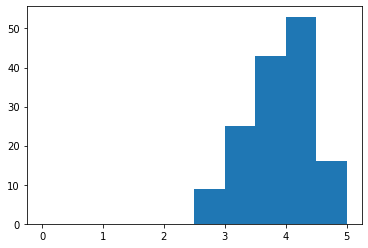

In [10]:
fig, ax = plt.subplots()
ax.hist(norm_reviews['Fandango_Ratingvalue'], range=(0, 5))
plt.show()

---
### Comparing Histograms

If you recall, one of the questions we were looking to answer was:
- What percent of the ratings are contained in the 2.0 to 4.0 range?

We can visually examine the proportional area that the bars in the 2.0 to 4.0 range take up and determine that more than 50% of the movies on Fandango fall in this range. We can increase the number of bins from 10 to 20 for improved resolution of the distribution. The length of each bin will be 0.25 (5 / 20) instead of 0.5 (5 / 10). The `bins` parameter for `Axes.hist()` is the second positional parameter, but can also be specified as a named paramter:

In [17]:
# Either of these will work:
ax.hist(norm_reviews['Fandango_Ratingvalue'], 20, range=(0,5))
ax.hist(norm_reviews['Fandango_Ratingvalue'], bins=20, range=(0,5))

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  7., 12.,
        13., 26., 17., 35., 18., 13.,  3.]),
 array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ,
        2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  ]),
 <BarContainer object of 20 artists>)

Let's now generate histograms using 20 bins for all four columns. To ensure that the scales for the y-axis are the same for all histograms, let's set them manually using `Axes.set_ylim()`.

---
1. For the subplot associated with `ax1`:
- Generate a histogram with the values in the `Fandango_Ratingvalue` column using 20 bins and a range of `0` to `5`.
- Set the title to `Distribution of Fandango Ratings`.
2. For the subplot associated with `ax2`:
- Generate a histogram of the values in the `RT_user_norm` column using 20 bins and a range of `0` to `5`.
- Set the title to `Distribution of Rotten Tomatoes Ratings`.
3. For the subplot associated with `ax3`:
- Generate a histogram of the values in the `Metacritic_user_nom` column using 20 bins and a range of `0` to `5`.
- Set the title to `Distribution of Metacritic Ratings`.
4. For the subplot associated with `ax4`:
- Generate a histogram of the values in the `IMDB_norm` column using 20 bins and a range of `0` to `5`.
- Set the title to `Distribution of IMDB Ratings`.
5. For all subplots:
- Set the y-axis ramge tp `0` to `50` using `Axes.set_ylim()`.
6. Use `plt.show()` to display the plots.

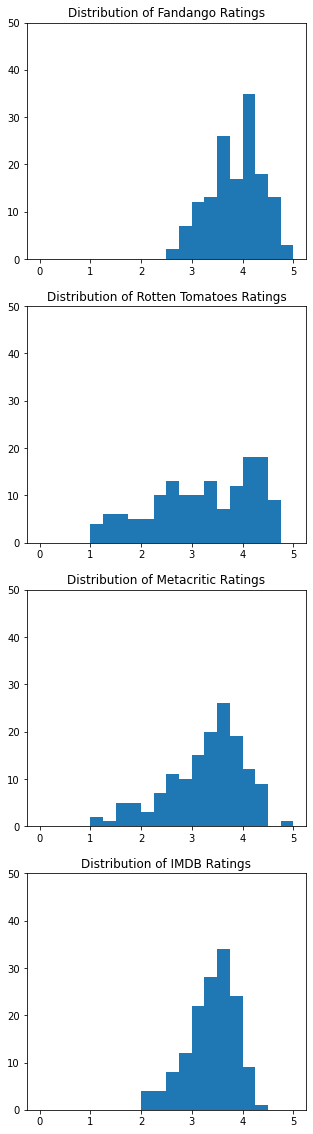

In [18]:
fig = plt.figure(figsize=(5,20))
ax1 = fig.add_subplot(4,1,1)
ax2 = fig.add_subplot(4,1,2)
ax3 = fig.add_subplot(4,1,3)
ax4 = fig.add_subplot(4,1,4)

ax1.hist(norm_reviews['Fandango_Ratingvalue'], bins=20, range=(0,5))
ax1.set_title('Distribution of Fandango Ratings')
ax1.set_ylim(0,50)

ax2.hist(norm_reviews['RT_user_norm'], bins=20, range=(0,5))
ax2.set_title('Distribution of Rotten Tomatoes Ratings')
ax2.set_ylim(0,50)

ax3.hist(norm_reviews['Metacritic_user_nom'], bins=20, range=(0,5))
ax3.set_title('Distribution of Metacritic Ratings')
ax3.set_ylim(0,50)

ax4.hist(norm_reviews['IMDB_norm'], bins=20, range=(0,5))
ax4.set_title('Distribution of IMDB Ratings')
ax4.set_ylim(0,50)

plt.show()

---
### Quartiles

From the histograms, we can make the following observations:
- Around 50% of user ratings from Fandango fall in the 2 to 4 range
- Around 50% of user ratings from Rotten Tomatoes fall in the 2 to 4 range
- Around 75% of the user ratings from Metacritic fall in the 2 to 4 range
- Around 90% of the user ratings from IMDB fall into the 2 to 4 range

While histograms allow us to visually estimate the percentage of ratings that fall into a range of bins, they don't allow us to easily understand how the top 25% or the bottom 25% of the ratings differ across the sites. The bottom 25% of values and top 25% of values both represent quartiles. The four quartiles divide the range of values into four regions where each region contains 1/4th of the total values.

While these regions may sound similar to bins, they differ in how values are grouped into each region. Each bin covers an equal proportion of the values in the range. On the other hand, each quartile covers an equal number of values (1/4th of the total values). To visualize quartiles, we need to use a **box plot**, also referred to as a box-and-whisker plot.

### Box Plot

A box plot consists of box-and-whisker diagrams, which represents the different quartiles in a visual way.

The two regions contained within the box in the middle make up the **interquartile** range, or IQR. The IQR is used to measure dispersion of the values. The ration of the length of the box to the whiskers around the box help us understand how values in the distribution are spread out.

We can generate a boxplot using `Axes.boxplot()`:

`ax.boxplot(norm_reviews['RT_user_norm'])`

Matplotlib will sort the values, calculate the quartiles that divide the values into four equal regions, and generate the box and whisker diagram.

---
1. Create a single subplot and assign the returned Figure object to `fig` and the returned Axes object to `ax`.
2. Generate a box plot from the values in the `RT_user_norm` column.
- Set the y-axis limit to range from `0` to `5`.
- Set the x-axis tick label to `Rotten Tomatoes`.
3. Use `plt.show()` to display the plot.

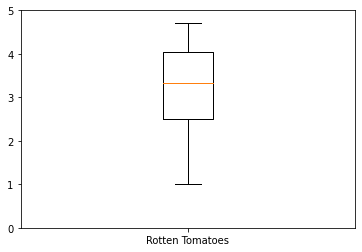

In [21]:
fig, ax = plt.subplots()
ax.boxplot(norm_reviews['RT_user_norm'])
ax.set_ylim(0,5)
# Remeber that tick labels takes in a list
ax.set_xticklabels(['Rotten Tomatoes'])
plt.show()

---
### Mutliple Box Plots

From the box plot we generated using Rotten Tomatoes ratings, we can conclude that:
- The bottom 25% of user ratings range from around 1 to 2.5
- The top 25% of user ratings range from around 4 to 4.6

To compare the lower and upper ranges with those for the other columns, we need to generate multiple box-and-whisker diagrams in the same box plot. When selecting multiple columns to pass in to `Axes.boxplot()`, we need to use the `values` accessor to return a multi-dimensional numpy array:

`num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']
ax.boxplot(norm_reviews[num_cols].values)`

---
1. Create a single subplot and assign the returned Figure object to `fig` and the returned Axes object to `ax`.
2. Generate a box plot containing a box-and-whisker diagram for each column in `num_cols`.
3. Set the x-axis tick labels to the column names in `num_cols` and rotate the ticks by `90` degrees.
4. Set the y-axis limit to range from `0` to `5`.
5. Use `plt.show()` to display the plot.

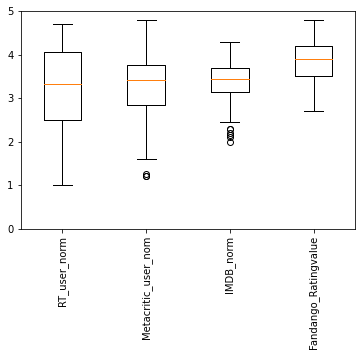

In [22]:
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue']

fig, ax = plt.subplots()
ax.boxplot(norm_reviews[num_cols].values)
ax.set_xticklabels(num_cols, rotation=90)
ax.set_ylim(0,5)
plt.show()